In [1]:
# only using uniform and normal for location perturb
# there's also gamma, exponential, bernoulli, poisson and binomial


# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt

import plotly.figure_factory as ff


# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
import numpy as np
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import vonmises

In [2]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [12]:
# random numbers from uniform distribution
n = 10000
width = 20
start = 595340.7799746467-width/2

data_uniform = uniform.rvs(size=n, loc = start, scale=width)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

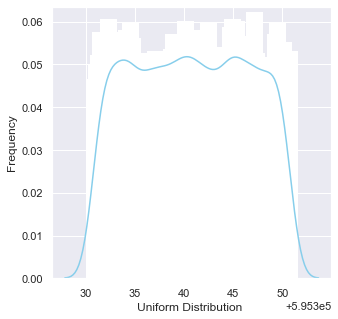

In [13]:
#could try using plotly for consistency, but this is just a test afterall

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')
#[Text(0,0.5,u'Frequency'), Text(0.5,0,u'Uniform Distribution ')]

In [9]:
# Normal distribution
#generate random numbers from N(0,1)
mu = 595340.7799746467 # mean - in the egen case, the original value
std = 10 # standard deviation
n = 10000 # number of samples, in our case the number of models

data_normal = norm.rvs(size=n,loc=mu,scale=std)

In [ ]:
#Gamma distribution
from scipy.stats import gamma
gamma_shape = 5 # this is the shape parameter 'a'. when a = 1, it approaches the exponential distribution
mu = 0
std = 10
n = 10000
data_gamma = gamma.rvs(a=gamma_shape, size=n, )


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

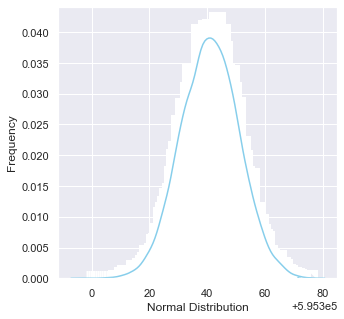

In [10]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

#[Text(0,0.5,u'Frequency'), Text(0.5,0,u'Normal Distribution')]

In [ ]:
hist_data = [data_uniform, data_normal, data_gamma]

grp_labels = ['uniform', 'normal', 'gamma']

fig = ff.create_distplot(hist_data, grp_labels, bin_size=1)
fig.show()

In [ ]:
# seems to work, just need to use the loc, scale and n variables so the original orientations can be input
# NOTE orientation data needs to be converted to vector normals before sampling, and then converted back

fig, ax = plt.subplots(1, 1)

kappa = 10


#datavm = vonmises() 
mean, var, skew, kurt = vonmises.stats(kappa, moments='mvsk')



x = np.linspace(vonmises.ppf(0.01, kappa),vonmises.ppf(0.99, kappa), 100)
ax.plot(x, vonmises.pdf(x, kappa), 'r-', lw=5, alpha=0.6, label='vonmises pdf')

rv = vonmises(kappa)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = vonmises.ppf([0.001, 0.5, 0.999], kappa)
np.allclose([0.001, 0.5, 0.999], vonmises.cdf(vals, kappa))


r = vonmises.rvs(kappa, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()